# Reduccion de Dimensionalidad

Cristobal Donoso Oliva<br>
Universidad de Concepcion, Chile<br>
cridonoso@inf.udec.cl<br>


_Viernes 20 de Noviembre del 2020_

## La Maldicion de la Dimensionalidad

> A medida que aumentamos la dimensionalidad de entrada, la cantidad de datos necesaria para generalizar correctamente crece exponencialmente. 

#### Que podemos hacer?
En general podemos utilizara dos enfoques (no excluyente):
- **Seleccion de Caractersticas**:
    - Eliminar columnas con missing values
    - Eliminar columnas cuya varianza es cercana a 0 
    - Eliminar columnas que esten altamente correlacionadas con otras
    - Eliminar columnas utilizando el criterio de importancia de un Random Forest
- **Reduccion de dimensionalidad**:
    - Transformar (linear o no lineal) nuestra matriz de entrada $\boldsymbol{x} \in \mathbb{R}^M$ para crear un conjunto de nuevas variables $\boldsymbol{x'} \in \mathbb{R}^D$ tal que $D < M$
    - Intuitivamente, creamos nuevas *variables resumen* que explican las **caracteristicas mas importantes** del conjunto original.
    
Reducir la dimensionalidad permite:
- Evitar el sobreajuste (cuando la cantidad de datos es menor que la cantidad de descriptores)
- Disminuir la complejidad (espacial y temporal) de nuestro algoritmo.
- Visualizar espacios multidimensionales i.e., mayor a 3.

En este tutorial nos concentraremos en el enfoque de **Reduccion de Dimensionalidad**

### Principal Components Analysis (PCA)
La idea detras de PCA es **maximizar la varianza** utilizando un subconjunto de **componentes** que describen el conjunto de datos.

**Que son las componentes? Como se calculan?**
![asd](./img/pca_axis.gif  "segment")

1. Sabemos que cualquier **rotacion preserva el orden relativo** o configuracion de los datos.
2. Por lo tanto, utilizamos **rotaciones para maximizar la capacidad discriminativa** entre los datos.
3. Esto se logra al **Maximizar la varianza** a lo largo de los ejes resultantes.
4. PCA realiza **transformaciones lineales** que proyectan los datos en un conjunto de **ejes ortogonales** (componentes principales)
5. Finalmente, se **ordenan las componentes** en funcion de la **varianza** explicada en ellos.

Si los datos tienen **distintas escalas** es posible que PCA de **mas enfasis** a aquellas variables que tienen **mayor varianza**:
> Por ejemplo, una variable cuya unidad de medida esta en horas, tendra una menor varianza con respecto a una variable que este en segundos, pese a que esten describiendo el mismo cambio. Aun cuando tengan la misma unidad de medida si la escala es distinta, digamos 150-300 y 1-3, PCA va a pesar mas los valores de la primera variable.

Para evitar este problema, es muy importante **normalizar** los datos **antes de aplicar PCA**

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from util import *
%matplotlib notebook

In [6]:
dat3 = np.fromfile('./data/dat3.dat', dtype=np.float32, sep='\n').reshape((1600,3))
labels = np.fromfile('./data/preswissroll_labels.dat', sep='\n')

In [7]:
feature1 = (dat3[:, 0]-np.mean(dat3[:, 0]))/np.std(dat3[:, 0])
feature2 = (dat3[:, 1]-np.mean(dat3[:, 1]))/np.std(dat3[:, 1])
feature3 = (dat3[:, 2]-np.mean(dat3[:, 2]))/np.std(dat3[:, 2])
scaled_data = np.vstack([feature1, feature2, feature3]).T

<IPython.core.display.Javascript object>


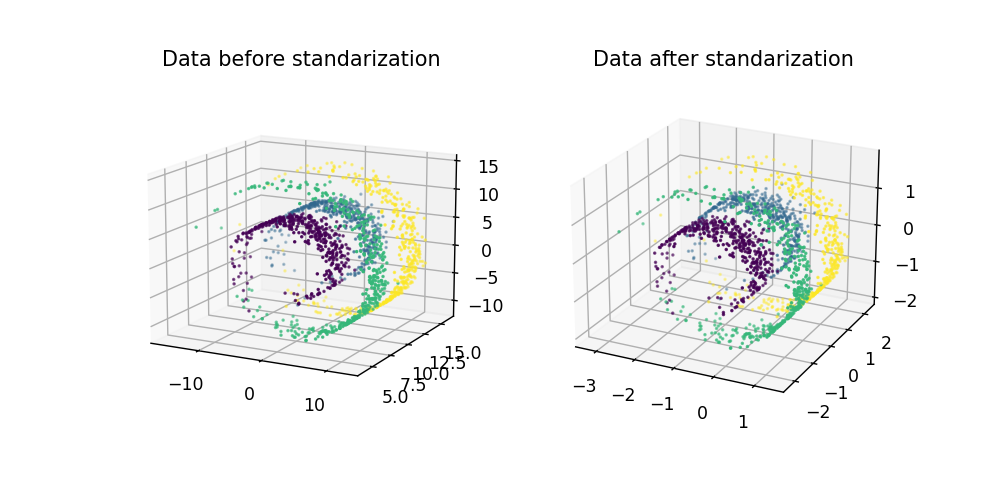

In [4]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(dat3[:,0], dat3[:,1], dat3[:,2], c = labels, s=1)
plt.title('Data before standarization')

ax = fig.add_subplot(122, projection='3d')
ax.scatter(scaled_data[:,0], scaled_data[:,1], scaled_data[:,2], c = labels, s=1)
plt.title('Data after standarization')
plt.show()

### Descomposicion de los Valores Propios

Los **valores propios** (eigenvalues) explican la **varianza de los datos proyectados** sobre los nuevos ejes.

Para ello debemos encontrar los valores y vectores propios de la **matriz de covarancia** $\Sigma_{dxd}$.
<br><br>
$\begin{equation}
\Sigma = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))
\end{equation}$

*Si no estas familiarizado con valores y vectores propios, [aqui puedes ver](https://www.youtube.com/watch?v=PFDu9oVAE-g) una explicacion intuitiva.*

Calculamos la **matriz de covarianza** de los datos

In [16]:
cov_mat = np.cov(scaled_data.T) # Numpy style
print('Dimension de la matriz de covarianza: {}'.format(cov_mat.shape))

Dimension de la matriz de covarianza: (3, 3)


In [17]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Vectores propios \n%s' %eig_vecs)
print('\nValores propios \n%s' %eig_vals)

Vectores propios 
[[-0.70553952  0.70797907  0.03129875]
 [ 0.09876332  0.05449658  0.9936176 ]
 [-0.70175479 -0.70412765  0.10837185]]

Valores propios 
[0.79439358 1.2054357  1.00204683]


Si visualizamos los vectores propios en el espacio de los datos,

In [19]:
v[0]

0.03129875058440279

<IPython.core.display.Javascript object>


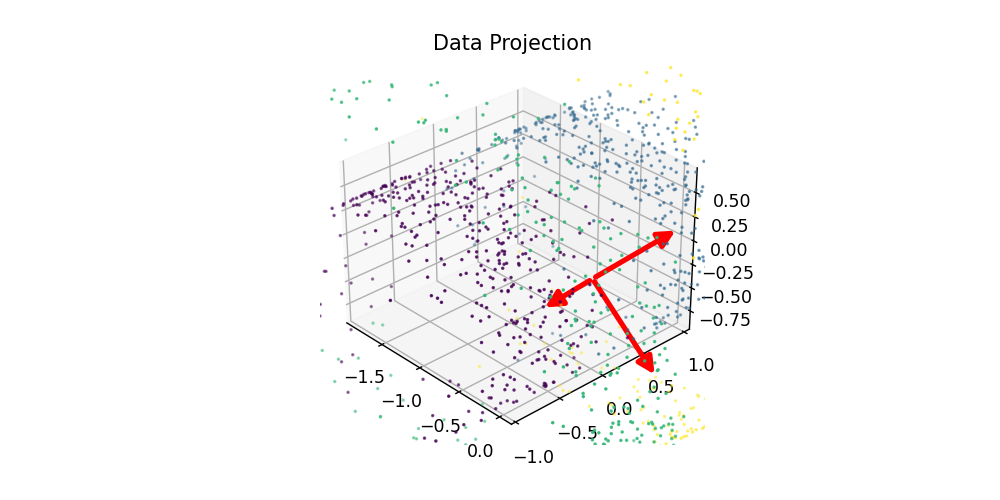

In [18]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection='3d')
# DATOS
ax.scatter(scaled_data[:,0], scaled_data[:,1], scaled_data[:,2], c = labels, s=1)
# VECTORES PROPIOS
for v in eig_vecs.T:
    a = Arrow3D([0., v[0]], # coordenada en x
                [0., v[1]], # coordenada en y
                [0., v[2]], # coordenada en z
                mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
    
plt.title('Data Projection')
plt.show()

In [23]:
# Hacemos una lista con tuplas (eigenvalue, eigenvector)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# Ordenamos por eigenvalue
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [24]:
eig_pairs

[(1.205435700476484, array([ 0.70797907,  0.05449658, -0.70412765])),
 (1.0020468267450398, array([0.03129875, 0.9936176 , 0.10837185])),
 (0.7943935841154951, array([-0.70553952,  0.09876332, -0.70175479]))]

In [31]:
primeras_dos_componentes = np.stack([eig_pairs[0][1], eig_pairs[1][1]], 1)

En este caso queremos **proyectar los datos** en sus **dos primeras componentes**, para ello solo debemos hacer la **transformacion lineal** utilizando los vectores propios,

In [39]:
x_reducido = []
for s in scaled_data:
    transformed = primeras_dos_componentes.T.dot(s)
    x_reducido.append(transformed)
x_reducido = np.array(x_reducido)

In [40]:
x_reducido

array([[-1.58991528, -1.05612455],
       [-1.1329922 , -0.516801  ],
       [-1.65819464, -1.59085095],
       ...,
       [ 1.33255416,  0.79851952],
       [ 1.62157391,  0.58589031],
       [ 0.79279656,  0.32517753]])

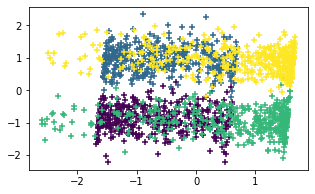

In [57]:
%matplotlib inline
plt.figure(figsize=(5,3))
plt.scatter(new_samples[:,0], new_samples[:,1], c=labels, marker='+')
plt.show()

## Utilizando Scikitlearn

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
xx = pca.transform(scaled_data)

In [60]:
xx.shape

(1600, 2)

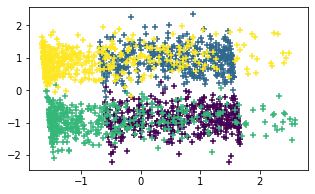

In [61]:
plt.figure(figsize=(5,3))
plt.scatter(xx[:,0], xx[:,1], c=labels, marker='+')
plt.show()

Existen distintas alternativas para implementar PCA:
- **Nonnegative Matrix Factorization (NMF)**: Proceso iterativo el cual asume que los datos $\boldsymbol{X}$ pueden ser representados por una transformacion lineal de componentes positivas $\boldsymbol{W}, \boldsymbol{Y}$ -i.e., $\boldsymbol{X} = \boldsymbol{W}\boldsymbol{Y}$.

- **Single Value Decomposition (SVD)**: Permite calcular la descomposicion de valores y vectores propios sin necesidad de calcular explicitamente la matriz de covarianza

# Visualizando componentes principales en imagenes de caras 

In [62]:
from sklearn.datasets import fetch_olivetti_faces

In [63]:
# Cargar datos
dataset = fetch_olivetti_faces(shuffle=True)
caras = dataset.data

num_muestras, numero_params = caras.shape

# Estandarizamos las imagenes
caras_estandarizadas = (caras - caras.mean(axis=0))/caras.std(axis=0)

In [67]:
np.sqrt(4096)

64.0

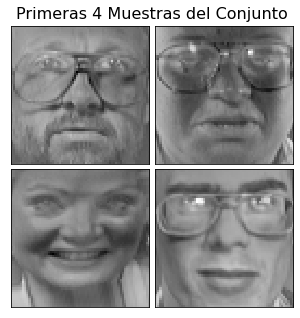

In [115]:
n_row, n_col = 2, 2
n_componentes = n_row * n_col
image_shape = (64, 64)

def plot_gallery(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    plt.show()


plot_gallery("Primeras {} Muestras del Conjunto".format(num_imagenes), caras_estandarizadas[:n_componentes])

### PCA para encontrar las componentes principales del conjunto de Datos

(4, 4096)


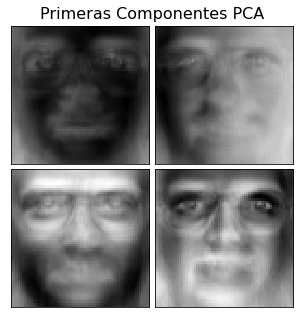

In [116]:
pca = PCA(n_components=n_componentes)
pca.fit(caras_estandarizadas)
comp = pca.components_
print(comp.shape)
plot_gallery('Primeras Componentes PCA', comp)

## Reconstruccion de caras utilizando las componentes principales


In [118]:
transf_pca = pca.transform(caras_estandarizadas[:n_componentes])
print('Dimensionalidad X reducido: ', transf_pca.shape) # Proyeccion en las primeras 4 componentes
rec_pca = pca.inverse_transform(transf_pca)

Dimensionalidad X reducido:  (4, 4)


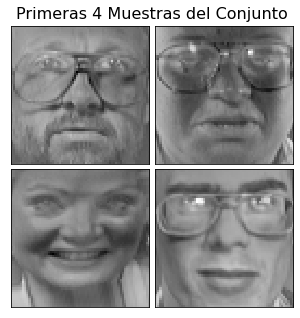

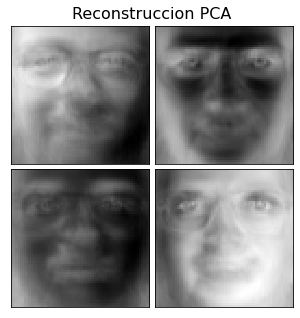

In [119]:
plot_gallery("Primeras {} Muestras del Conjunto".format(num_imagenes), caras_estandarizadas[:n_componentes])
plot_gallery('Reconstruccion PCA',rec_pca[:n_componentes])

Utilizando **NMF**

In [120]:
from sklearn.decomposition import NMF

/home/cridonoso/.conda/envs/tf2/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


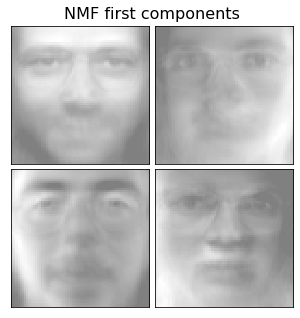

In [128]:
nmf = NMF(n_components=n_componentes)
nmf.fit(caras)
comp = nmf.components_

plot_gallery('NMF first components',comp[:n_componentes])

In [129]:
rec_nmf = nmf.inverse_transform(nmf.transform(caras[:n_componentes]))

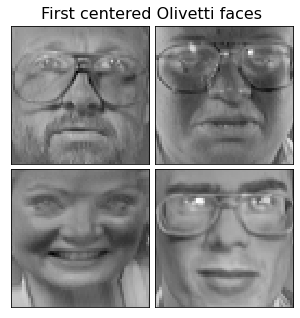

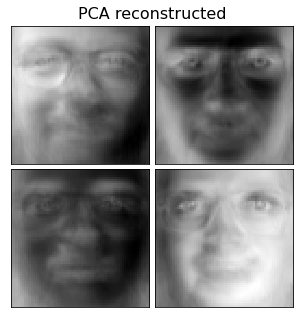

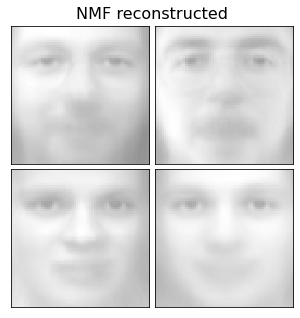

In [130]:
plot_gallery("First centered Olivetti faces", caras_estandarizadas[:n_componentes])
plot_gallery('PCA reconstructed',rec_pca[:n_componentes])
plot_gallery('NMF reconstructed',rec_nmf[:n_componentes])

## Linear Discriminant Analysis (LDA)
### Analisis Discriminante Lineal

LDA busca **maximizar la separabilidad** entre **categorias conocidas** (a diferencia de PCA que busca maximizar la varianza de las proyecciones sin utilizar informacion de las categorias)

Para crear un **nuevo eje** sobre el cual proyectar los datos LDA utiliza dos criterios:
- **Maximizar la distancia** entre las **medias** de las categorias
- **Minimizar la variacion** dentro de cada categoria

In [154]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [165]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda = lda.fit(scaled_data, labels)
X_r2 = lda.transform(scaled_data)
np.unique(labels)

array([1., 2., 3., 4.])

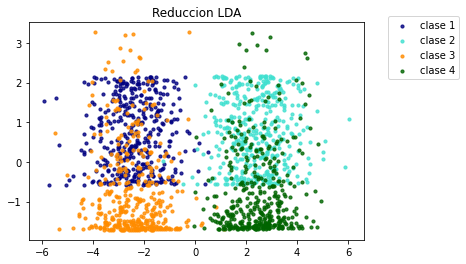

In [182]:
colors = ['navy', 'turquoise', 'darkorange', 'darkgreen']

plt.figure()
for color, i, target_name in zip(colors, [1, 2, 3, 4], ['clase 1', 'clase 2', 'clase 3', 'clase 4']):
    plt.scatter(X_r2[labels == i][:, 0], X_r2[labels == i][:, 1], alpha=.8, color=color,
                label=target_name, s=10)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Reduccion LDA')

plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.show()

# Manifold Learning
### Reduccion de dimensionalidad no lineal

Como vimos anteriormente, PCA asume linealidad a la hora de reducir dimensionalidad. Este no siempre es el caso, por ejemplo, en el conjunto de datos anterior,

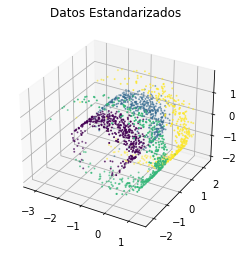

In [141]:
%matplotlib inline
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:,0], scaled_data[:,1], scaled_data[:,2], c = labels, s=1)
plt.title('Datos Estandarizados')
plt.show()

Para poder lidear con una **reduccion no lineal** de los datos, utilizamos tecnicas de *manifold learning*

## Multidimensional Scaling (MDS)

In [184]:
from sklearn.manifold import MDS

In [193]:
embedding = MDS(n_components=2)
indices = np.arange(0, len(scaled_data))
indices = np.random.choice(indices, 300)

x_mds = embedding.fit_transform(scaled_data[indices])

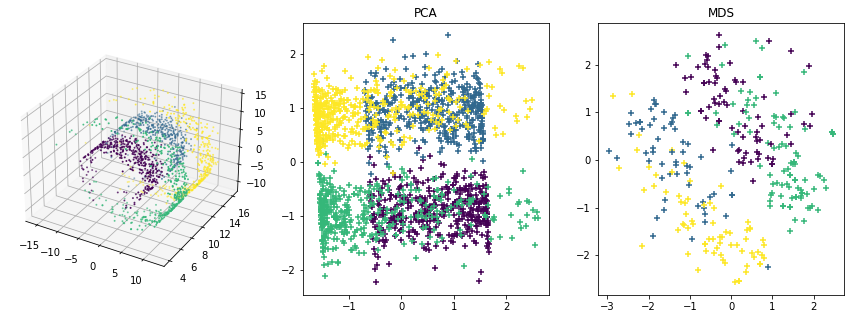

In [194]:
# ======== PLOTING RESULTS ============
fig = plt.figure(figsize=(15,5))
#Original
ax = fig.add_subplot(131, projection='3d')
ax.scatter(dat3[:,0], dat3[:,1], dat3[:,2], c = labels, s=1)
#PCA
ax = fig.add_subplot(132)
plt.scatter(xx[:,0], xx[:,1], c=labels, marker='+')
plt.title('PCA')
#LLE
ax = fig.add_subplot(133)
plt.scatter(x_mds[:,0], x_mds[:,1], c=labels[indices], marker='+')
plt.title('MDS')
plt.show()

# Locally Linear Embedding (LLE)

LLE es un algoritmo no supervisado que intenta **mapear datos** desde una alta dimensionalidad en una baja dimensionalidad **manteniendo la geometria local de las vecindidades de cada punto**

![](./img/lle_algorithm.gif)

- Por cada punto, buscamos una reconstruccion de este desde sus k-vecinos. 
- La reconstruccion se realiza con una matriz de pesos que codifica la geometria local de cada punto
- Con estos pesos fijos, podemos encontrar una representacion de menor dimensionalidad que mantiene las relaciones topologicas entre los vecinos.

In [195]:
from sklearn.manifold import LocallyLinearEmbedding
# ============= PCA ===================
pca = PCA(n_components=2)
pca.fit(scaled_data)
xx = pca.transform(scaled_data)

# ============= LLE ===================
k = 6 # neighbors
lle = LocallyLinearEmbedding (n_neighbors=k, n_components=2, method = "modified")
lle.fit(scaled_data)
Y_lle = lle.transform(scaled_data)

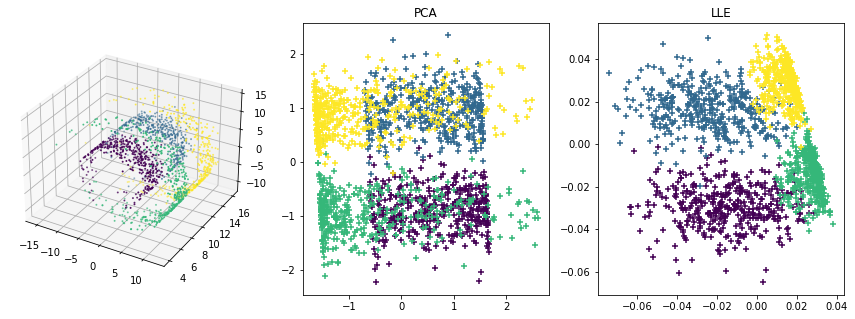

In [196]:
# ======== PLOTING RESULTS ============
fig = plt.figure(figsize=(15,5))
#Original
ax = fig.add_subplot(131, projection='3d')
ax.scatter(dat3[:,0], dat3[:,1], dat3[:,2], c = labels, s=1)
#PCA
ax = fig.add_subplot(132)
plt.scatter(xx[:,0], xx[:,1], c=labels, marker='+')
plt.title('PCA')
#LLE
ax = fig.add_subplot(133)
plt.scatter(Y_lle[:,0], Y_lle[:,1], c=labels, marker='+')
plt.title('LLE')
plt.show()

# Isometric Mapping (IsoMap)


IsoMap es otro metodo no lineal de reduccion de dimensionalidad basado en teoria espectral. Es similar a LLE pero utiliza un grafo para mantener las distancias geodesicas en una menor dimensionalidad. 
![](./img/isomap_explain.png)

[imagen](https://blog.paperspace.com/dimension-reduction-with-isomap/)

In [146]:
from sklearn.manifold import Isomap

In [149]:
c = 2
# ============= PCA ===================
pca = PCA(n_components=c)
pca.fit(scaled_data)
xx = pca.transform(scaled_data)
# ============= LLE ===================
k = 6 # neighbors
lle = LocallyLinearEmbedding (n_neighbors=k, n_components=c, method = "modified")
lle.fit(scaled_data)
Y_lle = lle.transform(scaled_data)
# =========== IsoMap ==================
k = 5
iso = Isomap (n_neighbors=k, n_components=c)
iso.fit(scaled_data)
Y_iso  = iso.transform (scaled_data)

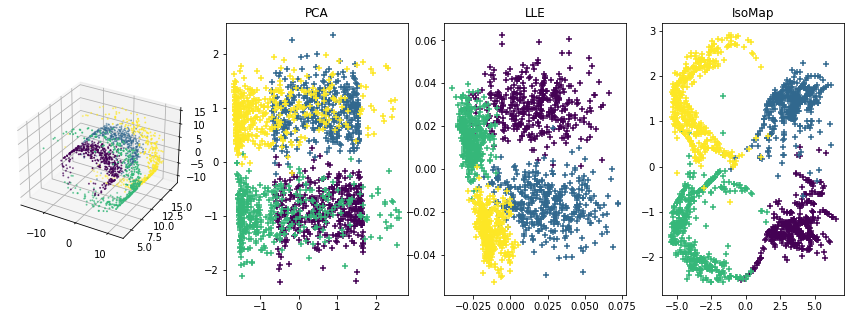

In [150]:
# ======== PLOTING RESULTS ============
fig = plt.figure(figsize=(15,5))
# Original
ax = fig.add_subplot(141, projection='3d')
ax.scatter(dat3[:,0], dat3[:,1], dat3[:,2], c = labels, s=1)
# PCA
ax = fig.add_subplot(142)
plt.scatter(xx[:,0], xx[:,1], c=labels, marker='+')
plt.title('PCA')
# LLE
ax = fig.add_subplot(143)
plt.scatter(Y_lle[:,0], Y_lle[:,1], c=labels, marker='+')
plt.title('LLE')
# ISOMAP
ax = fig.add_subplot(144)
plt.scatter(Y_iso[:,0], Y_iso[:,1], c=labels, marker='+')
plt.title('IsoMap')

plt.show()

# t-distributed stochastic neighbor embedding (t-SNE)
It maps multi-dimensional data to two or more dimensions suitable for human observation
\begin{equation}
p_{j|i} = \frac{\exp(-||\boldsymbol{x}_i-\boldsymbol{x}_j||^2/(2\sigma_i^2))}{\sum_{k\neq i}\exp(-||\boldsymbol{x}_i-\boldsymbol{x}_k||^2/(2\sigma_i^2)}
\end{equation}
<br>
\begin{equation}
q_{j|i} = \frac{\exp(-||\boldsymbol{y}_i-\boldsymbol{y}_j||^2/(2\sigma_i^2))}{\sum_{k\neq i}\exp(-||\boldsymbol{y}_i-\boldsymbol{y}_k||^2/(2\sigma_i^2)}
\longrightarrow
q_{j|i}=\frac{(1+||\boldsymbol{y}_i-\boldsymbol{y}_j||^2)^{-1}}{\sum_{k\neq l}(1+||\boldsymbol{y}_k-\boldsymbol{y}_l||^2)^{-1}}
\end{equation}

In [152]:
from sklearn.manifold import TSNE
c = 2
# ============= PCA ===================
pca = PCA(n_components=c)
pca.fit(scaled_data)
xx = pca.transform(scaled_data)
# ============= LLE ===================
k = 6 # neighbors
lle = LocallyLinearEmbedding (n_neighbors=k, n_components=c, method = "modified")
lle.fit(scaled_data)
Y_lle = lle.transform(scaled_data)
# =========== IsoMap ==================
k = 5
iso = Isomap (n_neighbors=k, n_components=c)
iso.fit(scaled_data)
Y_iso  = iso.transform (scaled_data)
# =========== t-SNE ===================
tsne = TSNE (n_components = 2)
y_tsne = tsne.fit_transform(scaled_data)

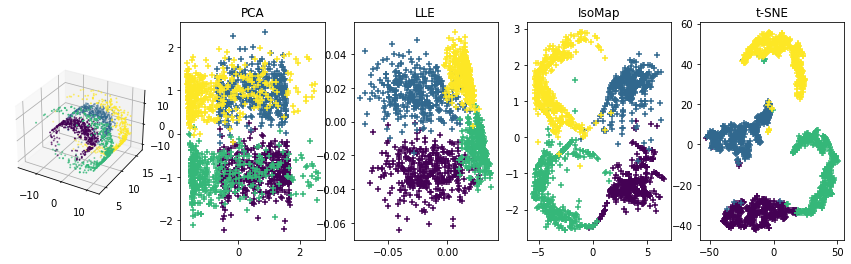

In [153]:
# ======== PLOTING RESULTS ============
fig = plt.figure(figsize=(15,4))
# Original
ax = fig.add_subplot(151, projection='3d')
ax.scatter(dat3[:,0], dat3[:,1], dat3[:,2], c = labels, s=1)
# PCA
ax = fig.add_subplot(152)
plt.scatter(xx[:,0], xx[:,1], c=labels, marker='+')
plt.title('PCA')
# LLE
ax = fig.add_subplot(153)
plt.scatter(Y_lle[:,0], Y_lle[:,1], c=labels, marker='+')
plt.title('LLE')
# ISOMAP
ax = fig.add_subplot(154)
plt.scatter(Y_iso[:,0], Y_iso[:,1], c=labels, marker='+')
plt.title('IsoMap')
#t-SNE
ax = fig.add_subplot(155)
plt.scatter(y_tsne[:,0], y_tsne[:,1], c=labels, marker='+')
plt.title('t-SNE')
plt.show()


Las conclusiones que podemos sacar de t-sne no son directas. Para un correcto uso de t-sne [revisa esta articulo](https://distill.pub/2016/misread-tsne/)

**UMAP** es una extension de t-sne pero mas rapido en ejecucion y con mejores propiedades topologicas [aqui puedes revisar una guia comparativa](https://pair-code.github.io/understanding-umap/)